# Modelos de regresión lineal

## Modelo con datos simulados

* El modelo de regresión lineal busca algo similar a --> y = a + b * x

* X : 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 2 + 2,2 * x + e
* e estará distribuida según una N(0, 0.8)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

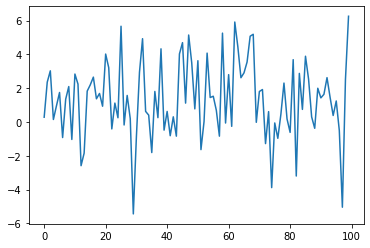

In [4]:
plt.plot(x)

In [5]:
res = 0 + 0.8 * np.random.randn(100)

In [6]:
y_pred = 2 + 2.2 * x

In [7]:
y_act = 2 + 2.2 * x + res

In [8]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [10]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_act": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [11]:
data.head()

,x,y_act,y_prediccion
0,0.279957,3.243813,2.615906
1,2.356612,6.312269,7.184547
2,3.026233,9.270267,8.657712
3,0.145923,1.771752,2.321032
4,0.955837,4.139310,4.102841


In [17]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual VS. Predicción')

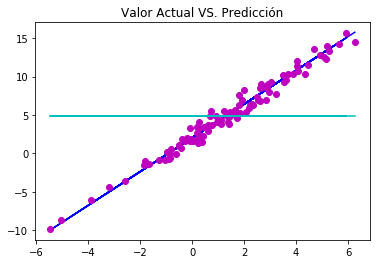

In [49]:
%matplotlib inline

plt.plot(x, y_pred, "b")
plt.plot(x, y_act, "mo")
plt.plot(x, y_mean, "c") # promedio
plt.title("Valor Actual VS. Predicción")

Parece que la predicción ha sido buena.

In [50]:
data["SSR"] = (data["y_prediccion"]-np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_act"])**2
data["SST"] = (data["y_act"] -  np.mean(y_act)) **2

In [51]:
data.head()

,x,y_act,y_prediccion,SSR,SSD,SST
0,0.279957,3.243813,2.615906,5.238355,0.394266,2.758385
1,2.356612,6.312269,7.184547,5.197922,0.760869,1.981386
2,3.026233,9.270267,8.657712,14.085462,0.375224,19.058598
3,0.145923,1.771752,2.321032,6.675092,0.301708,9.815058
4,0.955837,4.139310,4.102841,0.642901,0.001330,0.585749


In [52]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [53]:
SSR

2474.604870569868

In [54]:
SSD

58.29105641040296

In [55]:
SST

2428.375589067106

In [56]:
SSR + SSD

2532.8959269802713

In [57]:
R2 = SSR/SST

In [58]:
R2

1.0190371216507417

(array([ 2.,  5.,  3., 11., 13., 17., 16., 15.,  7., 11.]),
 array([-1.91476562, -1.58632527, -1.25788493, -0.92944459, -0.60100425,
        -0.27256391,  0.05587643,  0.38431677,  0.71275711,  1.04119745,
         1.36963779]),
 <a list of 10 Patch objects>)

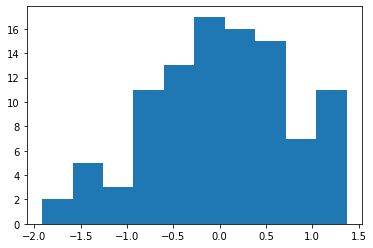

In [61]:
plt.hist(data["y_prediccion"] - data["y_act"])

## Ejercicio: demostrar que SST = SSR + SSD

Vamos a demostrar formalmente la igualdad SST = SSR + SSD que hemos estado utilizando en la teoría.

Utilizando la notación del ejercicio previo, es decir:
* ```y_i``` = el valor actual i-ésimo
* ```y_m``` = media de los valores actuales
* ```z_i``` = valor predictor i-ésimo (el que nos da la recta de regresión).

Podemos escribir:

```y_i - y_m = (y_i - z_i) + (z_i - y_m)```

Y si ahora elevamos al cuadrado, y aplicamos la identidad notable obtenemos que:

```(y_i - y_m)^2 = (y_i - z_i)^2 + (z_i - y_m)^2 + 2(y_i + z_i)(z_i - y_m)```

De aquí, aplicando sumatorio a cada uno de los factores anteriores se deduce que para demostrar que ```SST = SSR + SSD ```, tenemos que probar que:

```sum(y_i - z_i)(z_i - y_m) = 0```

Notemos que podemos obviar el 2 porque para ello expresamos ```(y_i - z_i)(z_i - y_m)``` de la siguiente forma:

```(y_i - z_i)(z_i - y_m) = (y_i - z_i)z_i - (y_i - z_i)y_m```

Ahora bien, en la demostración del vídeo de la clase 74, la primera ecuación normal vemos que:

```sum(y_i - z_i) = 0```

Por lo tanto será suficiente ver que

```sum(y_i - z_i)z_i = 0```

Para ello, basta escribir qué es ```z_i```, no es otra cosa que:

```z_i = a + bx_i```

y si entonces sustituimos en la suma anterior y operamos, tenemos que:

```sum(y_i - z_i)z_i = sum(y_i - z_i)a + b*sum(y_i - z_i)x_i```

De nuevo, el primero sumatorio es cero por la primera ecuación. El segundo sumatorio también es cero por la segunda ecuación normal que aparece en el minuto 5:26 del vídeo 74.





## Obteniendo la recta de regresión

* y = a + b*x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b*x_m

Vamos a utilizar la x como variable predictora.

In [63]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_act"])
x_mean, y_mean

(1.331400488242067, 4.904651648216468)

In [64]:
data["beta_n"] = (data["x"] - x_mean)*(data["y_act"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [65]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [66]:
alpha = y_mean - beta * x_mean

In [67]:
alpha, beta

(2.0373594901840977, 2.1535910369225113)

El modelo lineal obtenido por regresión es: y = 2.0373594901840977 + 2.1535910369225113 * x

In [69]:
data["y_model"] = alpha + beta * data["x"]

In [70]:
data.head()

,x,y_act,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.279957,3.243813,2.615906,5.238355,0.394266,2.758385,1.746277,1.105532,2.640273
1,2.356612,6.312269,7.184547,5.197922,0.760869,1.981386,1.443106,1.051059,7.112538
2,3.026233,9.270267,8.657712,14.085462,0.375224,19.058598,7.398986,2.872456,8.554627
3,0.145923,1.771752,2.321032,6.675092,0.301708,9.815058,3.713980,1.405356,2.351619
4,0.955837,4.139310,4.102841,0.642901,0.001330,0.585749,0.287435,0.141048,4.095841


In [71]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"] - data["y_act"])**2)
SST = sum((data["y_act"] -  y_mean) **2)

In [72]:
SSR, SSD, SST

(2371.2453807868674, 57.13020828023992, 2428.375589067106)

In [73]:
R2 = SSR/SST

In [74]:
R2

0.9764738994505434

Text(0.5, 1.0, 'Valor Actual VS. Predicción')

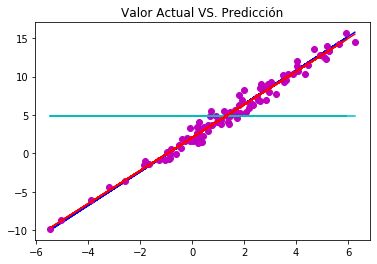

In [77]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline

plt.plot(x, y_pred, "b")
plt.plot(x, y_act, "mo")
plt.plot(x, y_mean, "c") # promedio
plt.plot(data["x"], data["y_model"], "r")
plt.title("Valor Actual VS. Predicción")

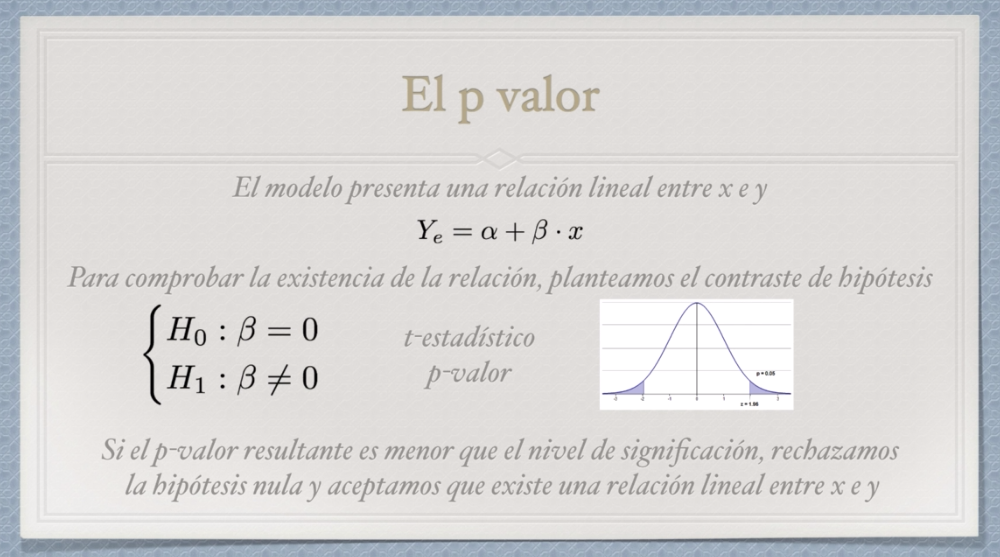

In [79]:
from IPython.display import Image
Image(filename="resources/regresion_lineal9.png")

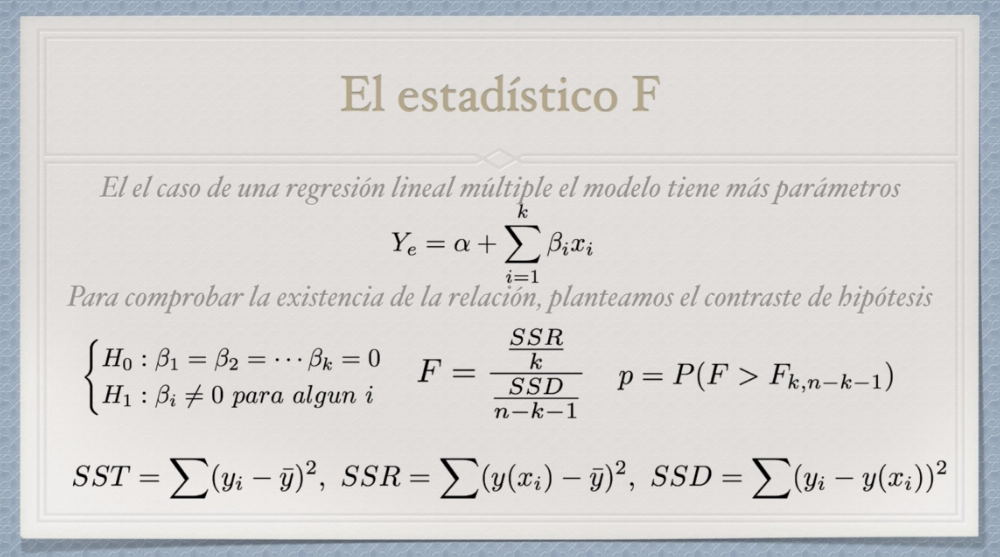

In [80]:
Image(filename="resources/regresion_lineal10.png")

F de Fisher

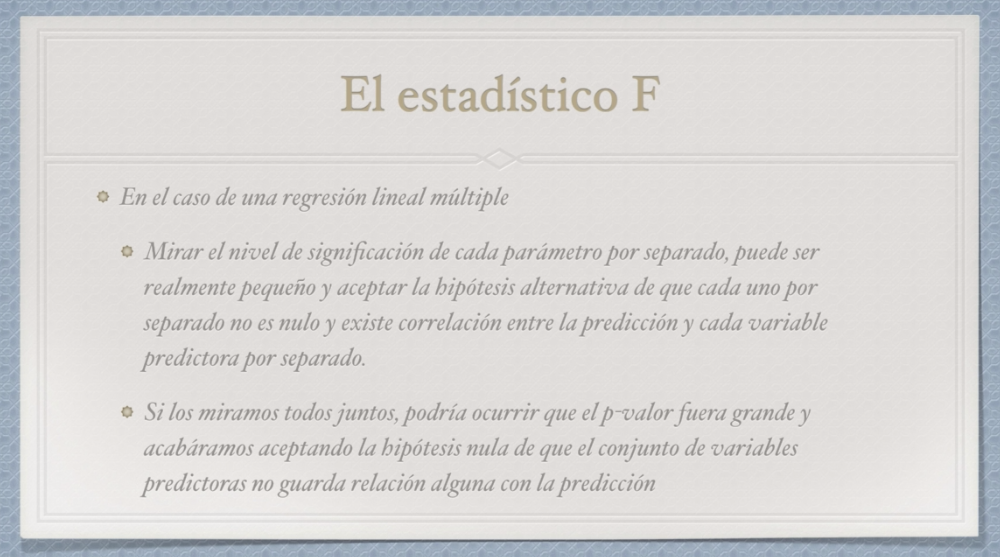

In [82]:
Image(filename="resources/regresion_lineal11.png")

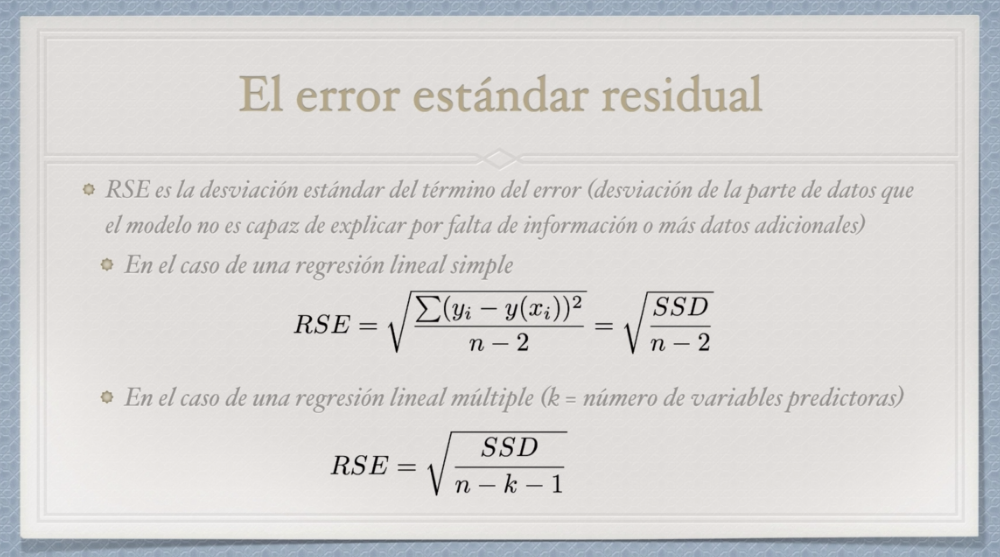

In [83]:
Image(filename="resources/regresion_lineal12.png")

## Error estándar de los residuos (RSE)

In [84]:
RSE = np.sqrt(SSD/(len(data)-2))

In [85]:
RSE

0.76351902987551

In [86]:
np.mean(data["y_act"])

4.904651648216468

In [87]:
# Se observa un error de 0.76 sobre 4.9
RSE/np.mean(data["y_act"])

0.15567242785798185

In [88]:
# Alrededor de un 15% de error, no parece demasiado alto